<a href="https://colab.research.google.com/github/Rohan-crypt/DeepLearning/blob/main/Exp_8_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exp** 8: Implementation of Multi-Layer Perceptron (MLP) with Activation and Loss Functions Visualization

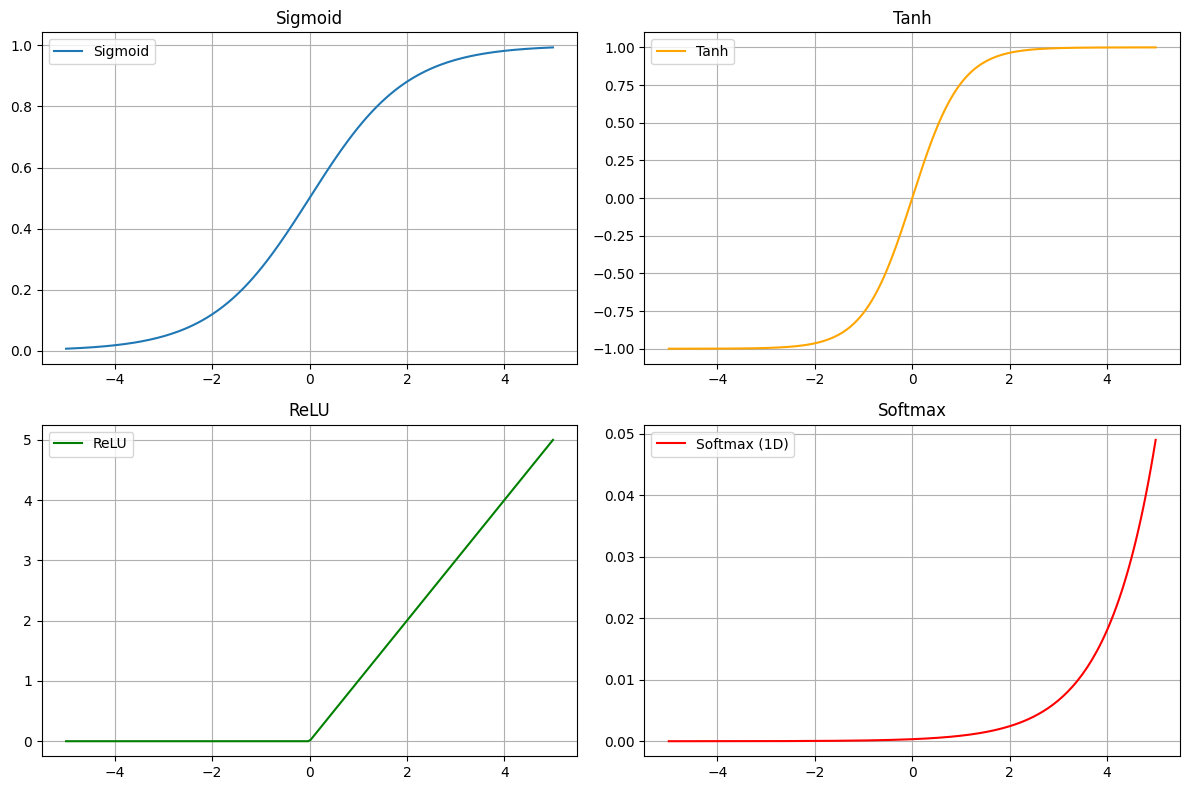

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def sigmoid(x): return 1/(1+np.exp(-x))
def tanh(x): return np.tanh(x)
def relu(x): return np.maximum(0,x)
def softmax(x): return np.exp(x)/np.sum(np.exp(x), axis=0)

# Input range
x = np.linspace(-5, 5, 200)

# Plot activations
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(x, sigmoid(x), label="Sigmoid")
plt.title("Sigmoid"); plt.grid(); plt.legend()

plt.subplot(2,2,2)
plt.plot(x, tanh(x), label="Tanh", color="orange")
plt.title("Tanh"); plt.grid(); plt.legend()

plt.subplot(2,2,3)
plt.plot(x, relu(x), label="ReLU", color="green")
plt.title("ReLU"); plt.grid(); plt.legend()

plt.subplot(2,2,4)
plt.plot(x, softmax(x), label="Softmax (1D)", color="red")
plt.title("Softmax"); plt.grid(); plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Loss functions
def mse(y_true, y_pred): return np.mean((y_true - y_pred)**2)

def cross_entropy(y_true, y_pred):
    eps = 1e-10
    return -np.mean(y_true*np.log(y_pred+eps) + (1-y_true)*np.log(1-y_pred+eps))

# Example predictions
y_true = np.array([0,1,1,0])
y_pred_good = np.array([0.1,0.9,0.8,0.2])
y_pred_bad  = np.array([0.9,0.1,0.2,0.8])

print("MSE (Good):", mse(y_true,y_pred_good))
print("MSE (Bad):", mse(y_true,y_pred_bad))
print("Cross-Entropy (Good):", cross_entropy(y_true,y_pred_good))
print("Cross-Entropy (Bad):", cross_entropy(y_true,y_pred_bad))


MSE (Good): 0.024999999999999994
MSE (Bad): 0.7250000000000001
Cross-Entropy (Good): 0.16425203336796243
Cross-Entropy (Bad): 1.9560115019640731


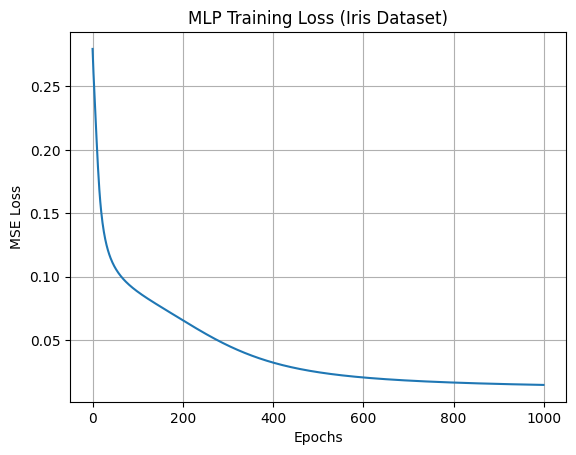

Training Accuracy: 0.975
Testing Accuracy: 1.0


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target.reshape(-1,1)

# One-hot encode target
encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# --- MLP Model ---
def sigmoid(x): return 1/(1+np.exp(-x))
def sigmoid_derivative(x): return x*(1-x)

# Initialize parameters
np.random.seed(42)
W1 = np.random.randn(4,8)   # Input (4) -> Hidden (8)
b1 = np.zeros((1,8))
W2 = np.random.randn(8,3)   # Hidden (8) -> Output (3)
b2 = np.zeros((1,3))
lr = 0.01
epochs = 1000
losses = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden = sigmoid(np.dot(X_train, W1) + b1)
    output = sigmoid(np.dot(hidden, W2) + b2)

    # Loss (MSE)
    loss = np.mean((Y_train-output)**2)
    losses.append(loss)

    # Backpropagation
    d_output = (Y_train-output)*sigmoid_derivative(output)
    d_hidden = d_output.dot(W2.T)*sigmoid_derivative(hidden)

    # Update weights
    W2 += hidden.T.dot(d_output)*lr
    b2 += np.sum(d_output,axis=0,keepdims=True)*lr
    W1 += X_train.T.dot(d_hidden)*lr
    b1 += np.sum(d_hidden,axis=0,keepdims=True)*lr

# Training accuracy
pred_train = np.argmax(output, axis=1)
true_train = np.argmax(Y_train, axis=1)
train_acc = np.mean(pred_train==true_train)

# Test accuracy
hidden_test = sigmoid(np.dot(X_test, W1)+b1)
output_test = sigmoid(np.dot(hidden_test, W2)+b2)
pred_test = np.argmax(output_test, axis=1)
true_test = np.argmax(Y_test, axis=1)
test_acc = np.mean(pred_test==true_test)

# Plot loss curve
plt.plot(losses)
plt.title("MLP Training Loss (Iris Dataset)")
plt.xlabel("Epochs"); plt.ylabel("MSE Loss")
plt.grid(); plt.show()

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
